In [1]:
import numpy as np   # working with arrays } Both numpy and pandas allow to manipulate data 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
%pip install mplfinance
import mplfinance as mpf

%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

%pip install chart-studio
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

%pip install cufflinks
import cufflinks  as cf # connect plotly to pandas
from plotly.offline import download_plotlyjs, init_notebook_mode, plot
init_notebook_mode(connected = True)
cf.go_offline()

%pip install beautifulsoup4
%pip install requests
import requests
from bs4 import BeautifulSoup # manipulate url data
import json
from pandas import DataFrame as df


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Grab Data from URL

<bound method Tag.prettify of 
<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID - Coronavirus Statistics - Worldometer</title>
<meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76
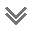

In [3]:
import requests
web_page = requests.get('https://www.worldometers.info/coronavirus/')
soup = BeautifulSoup(web_page.text, 'html.parser')
print(soup.prettify)
#pip show requests
#print(requests.__version__)

# Basic Covid Data

In [13]:
covid_data = soup.find_all("div", class_ = "maincounter-number")
print("Coronavirus cases till 2024: ", covid_data[0].text.strip())
print("Coronavirus caused deaths till 2024: ", covid_data[1].text.strip())
print("Coronavirus recovered cases till 2024: ", covid_data[2].text.strip())

data = soup.find_all("script", {"type":"text/javascript"})
# for content in data:
 #   print(content)

Coronavirus cases till 2024:  704,753,890
Coronavirus caused deaths till 2024:  7,010,681
Coronavirus recovered cases till 2024:  675,619,811
<script src="https://cdn.datatables.net/1.10.19/js/jquery.dataTables.min.js" type="text/javascript"></script>
<script src="https://cdn.datatables.net/1.10.19/js/dataTables.bootstrap.min.js" type="text/javascript"></script>
<script class="init" type="text/javascript">
		$.extend( $.fn.dataTable.defaults, {
    responsive: true
} );
	
	$(document).ready(function() {
    $('#example2').dataTable( {
        "scrollCollapse": true,
		"sDom": '<"bottom"flp><"clear">',
        "paging":         false
    } );
} );
	</script>
<script class="init" type="text/javascript">
		$.extend( $.fn.dataTable.defaults, {
    responsive: true
} );
	
	$(document).ready(function() {
    $('#table3').dataTable( {
        "scrollCollapse": true,
				 "order": [[ 1, 'desc' ]],
		"sDom": '<"bottom"flp><"clear">',
        "paging":         false
    } );
} );
	</script>
<scr

In [15]:
results = soup.find(id = 'main_table_countries_today')
content = results.find_all('td')
# content

In [18]:
clean_data = ""
for data in content:
    clean_data += data.text.strip() + "|"
    clean_data = clean_data.replace("+", "")
    clean_data = clean_data.replace("N/A", "0")
# clean_data

# Cleaning up with Regex

In [20]:
import re

# Got a list of countries from the websit

countries = [
     'USA', 'India','France','Germany','Brazil','S. Korea','Japan','Italy','UK','Russia','Turkey','Spain','Australia','Vietnam',
    'Taiwan','Argentina','Netherlands','Mexico','Iran','Indonesia','Poland','Colombia','Greece','Austria','Portugal','Ukraine',
    'Chile','Malaysia','Canada','Belgium','Israel','DPRK','Thailand','Czechia','Peru','Switzerland','Philippines','South Africa',
    'Romania','Denmark','Singapore','Hong Kong','Sweden','New Zealand','Serbia','Iraq','Hungary','Bangladesh','Slovakia','Georgia',
    'Jordan','Ireland','Pakistan','Finland','Norway','Kazakhstan','Lithuania','Slovenia','Bulgaria','Croatia','Guatemala','Morocco',
    'Lebanon','Costa Rica','Bolivia','Tunisia','Cuba','Ecuador','UAE','Panama','Uruguay','Mongolia','Nepal','Belarus','Latvia','Saudi Arabia',
    'Paraguay','Azerbaijan','Bahrain','Cyprus','Dominican Republic','Sri Lanka','Kuwait','Myanmar','Moldova','Estonia','Palestine',
    'Venezuela','Egypt,Qatar','Libya','China','Ethiopia','Réunion','Honduras','Armenia','Bosnia ','Oman','Luxembourg','North Macedonia',
    'Zambia','Kenya','Brunei','Albania','Botswana','Montenegro','Algeria','Nigeria','Zimbabwe','Uzbekistan','Afghanistan','Mozambique',
    'Martinique','Laos','Iceland','Kyrgyzstan','Guadeloupe','El Salvador','Trinidad','Maldives','Namibia','Uganda','Ghana','Jamaica',
    'Cambodia','Rwanda','Cameroon','Malta','Barbados','Angola','Channel Islands','DRC','French Guiana','Malawi','Senegal','Ivory Coast',
    'Suriname','New Caledonia','French Polynesia','Eswatini','Guyana','Belize','Fiji','Madagascar','Cabo Verde','Sudan','Mauritania',
    'Bhutan','Syria','Burundi','Seychelles','Gabon','Andorra','Papua New Guinea','Curaçao','Aruba','Tanzania','Mauritius','Mayotte',
    'Togo','Guinea','Bahamas','Isle of Man','Lesotho','Haiti','Faeroe Islands','Mali','Cayman Islands','Saint Lucia','Benin','Macao',
    'Somalia','Micronesia','San Marino','Solomon Islands','Congo','Timor-Leste','Burkina Faso','Liechtenstein','Gibraltar','Grenada',
    'Bermuda','South Sudan','Nicaragua','Tajikistan','Equatorial Guinea','Monaco','Samoa','Tonga','Marshall Islands','Dominica','Djibouti',
    'CAR','Gambia','Saint Martin','Vanuatu','Greenland','Yemen','Caribbean Netherlands','Sint Maarten','Eritrea','Niger','St. Vincent Grenadines',
    'Guinea-Bissau','Comoros','Antigua','Liberia','Sierra Leone','Chad','British Virgin Islands','Cook Islands','Sao Tome','Turks',
    'Saint Kitts','Palau','St. Barth','	Nauru','Kiribati','Anguilla','Wallis','Saint Pierre Miquelon','Tuvalu','Saint Helena','Falkland Islands',
    'Montserrat','Niue','Diamond Princess','Tokelau','Vatican City','Western Sahara','MS Zaandam'
]



for c in countries:
    pattern = c+"[,|\d]*"
    data = re.search(pattern, clean_data, re.IGNORECASE)
    if data is not None:
        print(data.group())

USA|111,820,082||1,219,487||109,814,428||786,167|940|333,985|3,642|1,186,851,502|3,544,901|334,805,269|
India|45,035,393||533,570||0|0|0|0|32,016|379|935,879,495|665,334|1,406,631,776|
France|40,138,560||167,642||39,970,918||0||612,013|2,556|271,490,188|4,139,547|65,584,518|
Germany|38,828,995||183,027||38,240,600||405,368|0|462,891|2,182|122,332,384|1,458,359|83,883,596|
Brazil|38,743,918||711,380||36,249,161||1,783,377|0|179,908|3,303|63,776,166|296,146|215,353,593|
S. Korea|34,571,873||35,934||34,535,939||0||673,523|700|15,804,065|307,892|51,329,899|
Japan|33,803,572||74,694||0|0|0|0|269,169|595|100,414,883|799,578|125,584,838|
Italy|26,723,249||196,487||26,361,218||165,544|22|443,445|3,261|281,126,449|4,665,010|60,262,770|
UK|24,910,387||232,112||24,678,275||0|0|363,666|3,389|522,526,476|7,628,357|68,497,907|
Russia|24,124,215||402,756||23,545,818||175,641|0|165,454|2,762|273,400,000|1,875,095|145,805,947|
Turkey|17,232,066||102,174||0|0|0|0|201,399|1,194|162,743,369|1,902,052|85,5

In [21]:
import os

# Get the current working directory
current_directory = os.getcwd()
print(f"Current Directory: {current_directory}")
new_directory = "D:/Python"
os.chdir(new_directory)

# Verify the change
print(f"Directory changed to: {os.getcwd()}")

Current Directory: C:\Users\javer\Practice Python\Python Projects
Directory changed to: D:\Python


# Working with CSV data

<Axes: xlabel='date'>

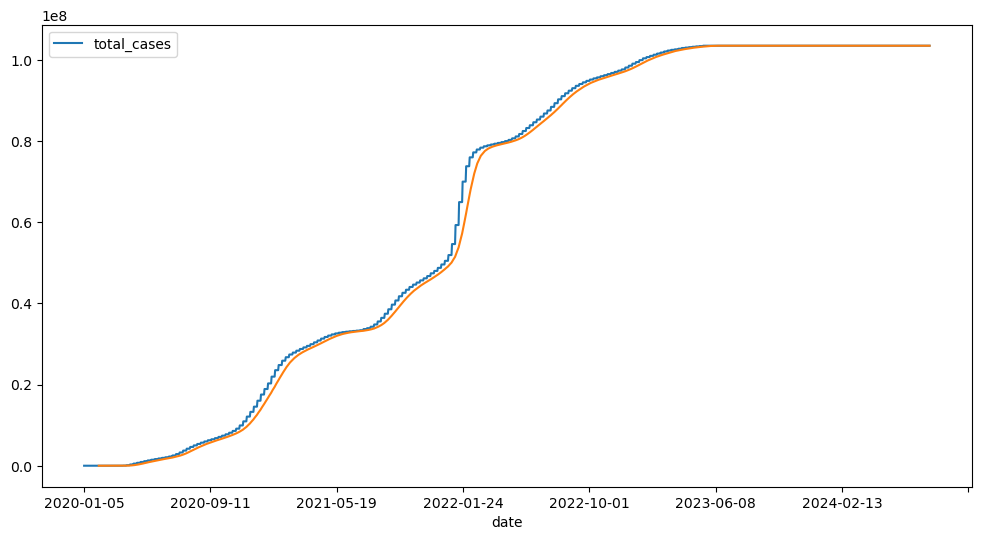

In [30]:
covid_df = pd.read_csv('owid-covid-data.csv')
covid_df.columns
country_df = covid_df.location.unique()
# country_df.size

indexer = covid_df[covid_df['location']=='United States'].index
USA_tc = covid_df.loc[indexer, 'date':'total_cases']
USA_tc = USA_tc.dropna()
USA_tc.set_index('date', inplace=True)
# USA_tc
USA_tc.plot(figsize = (12,6))
USA_tc.rolling(window = 30).mean()['total_cases'].plot()

### The USA is just doing fine as it coincides with the moving average. The total cases since early 2023 are falling exactly on the moving average line.

<Axes: xlabel='date'>

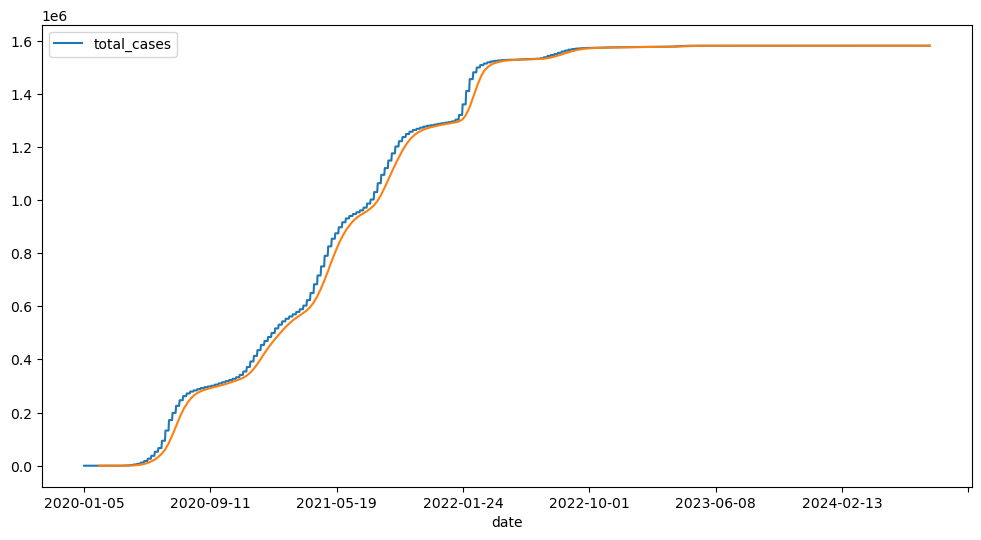

In [33]:
indexer = covid_df[covid_df['location']=='Pakistan'].index
Pak_tc = covid_df.loc[indexer, 'date':'total_cases']
Pak_tc = Pak_tc.dropna()
Pak_tc.set_index('date', inplace=True)
# USA_tc
Pak_tc.plot(figsize = (12,6))
Pak_tc.rolling(window = 30).mean()['total_cases'].plot()

# Do Lockdowns work

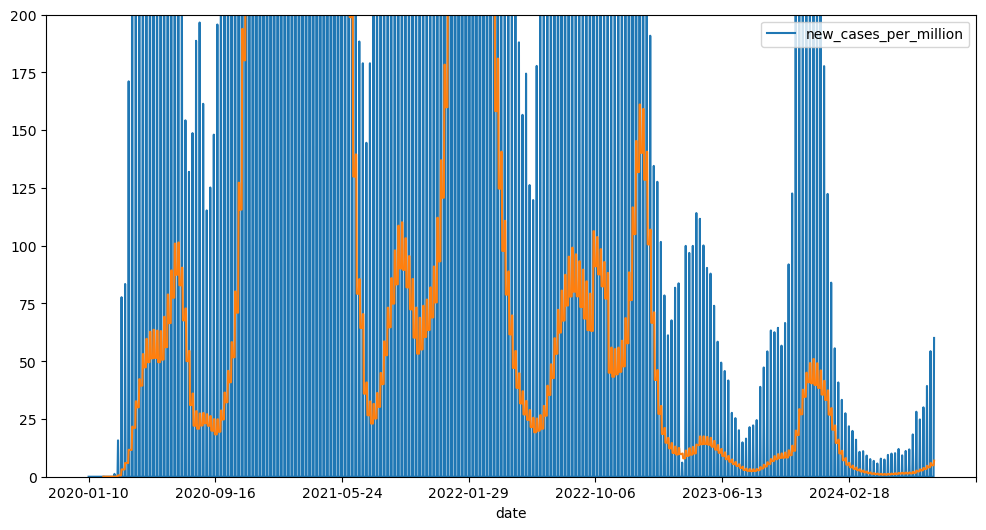

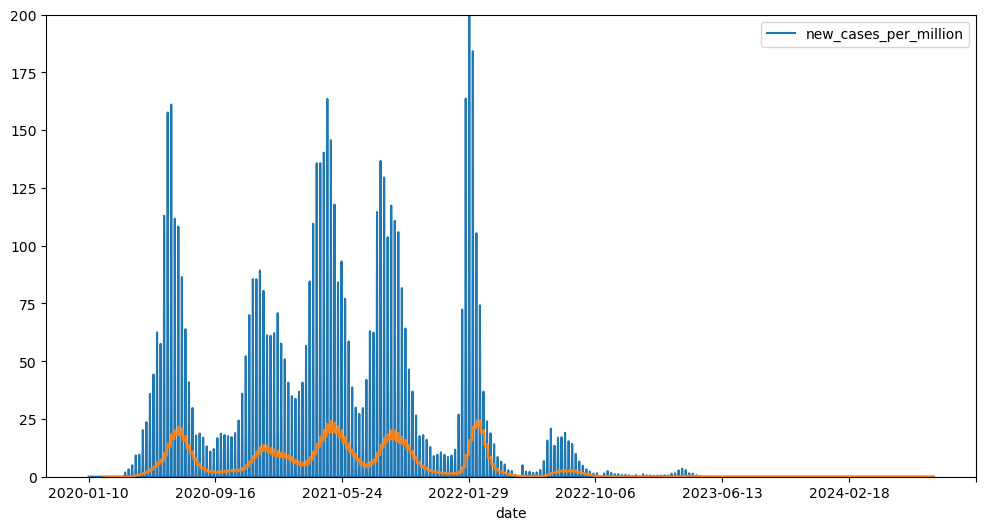

In [40]:
def plot_covid_data(country, col, plot_ma=False, y_max = 200):
    indexer = covid_df[covid_df['location']==country].index
    country_df = covid_df.loc[indexer, 'date':col]
    country_df = country_df.dropna()
    country_df.set_index('date', inplace=True)
    country_df.drop(country_df.columns.difference([col]),axis=1,inplace=True)
    country_df.plot(figsize = (12,6), ylim = [0,y_max])
    
    if plot_ma:
        country_df.rolling(window = 30).mean()[col].plot()

plot_covid_data('Sweden', 'new_cases_per_million', True)
plot_covid_data('Pakistan', 'new_cases_per_million', True)

### We can see that cases per million has drastically decreased for Pakistan during the lockdown era whereas for Sweden which didn't lockdown the value is really large during but values are also increaing after every wave (three waves in total).
### Also it is to be noted that the cases per million is very high for Sweden.

# How does median age affect death rate?

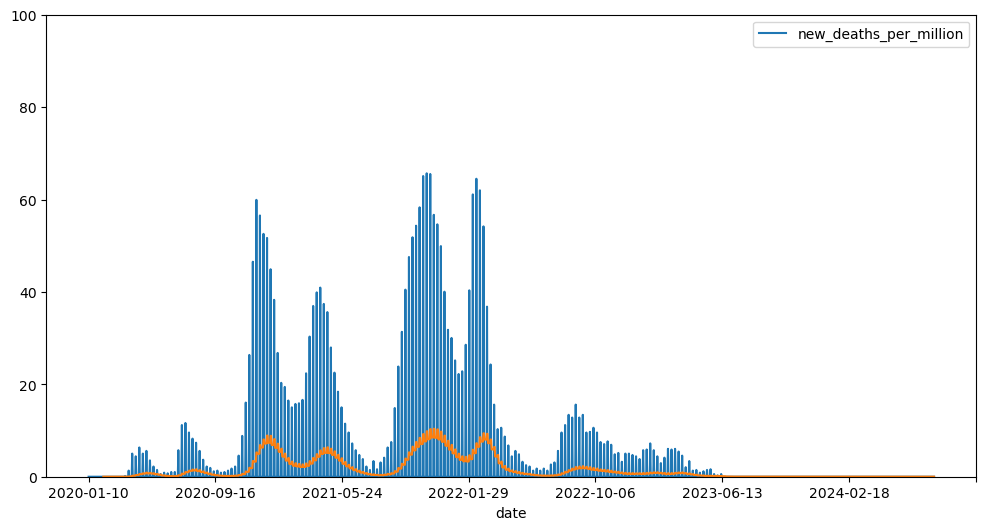

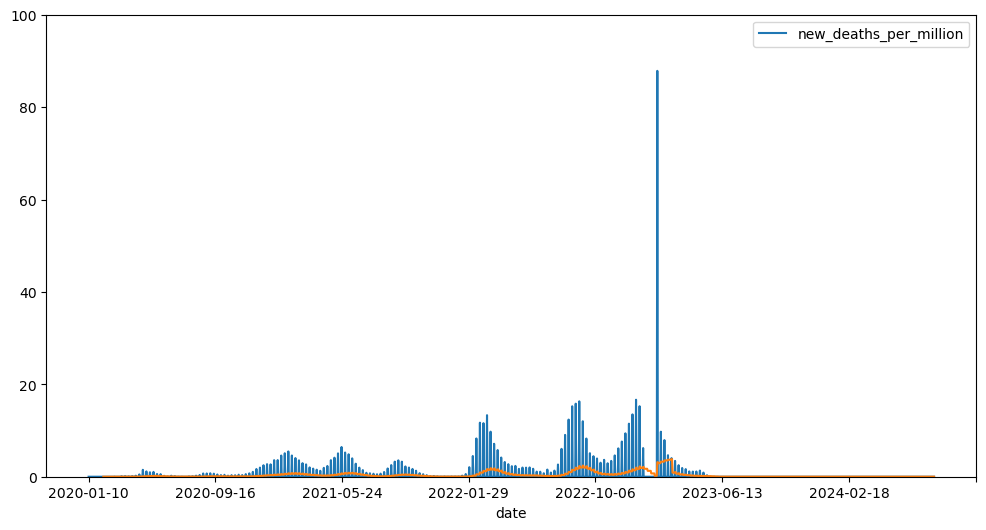

In [45]:

plot_covid_data('Serbia', 'new_deaths_per_million', True, 100)   # Niger has the lowest median age
plot_covid_data('Japan', 'new_deaths_per_million', True, 100)   # Japan has a very high elderly poulation

### We cannot see much affect of median age on death rate

# How does Obesity affects the death rate?

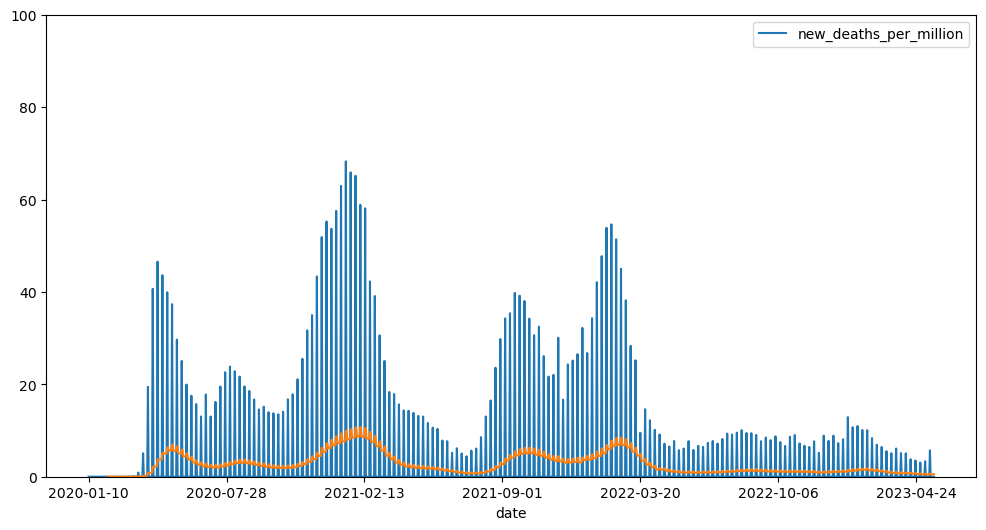

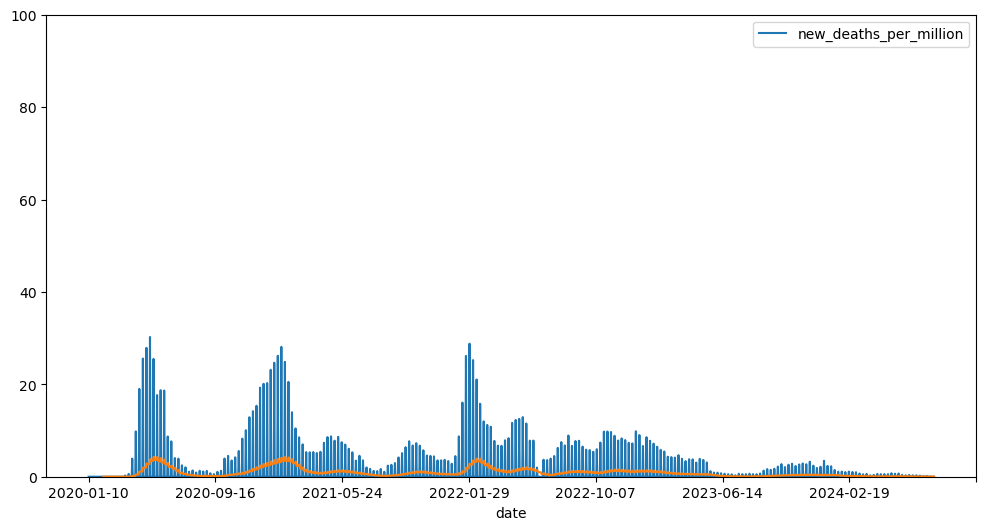

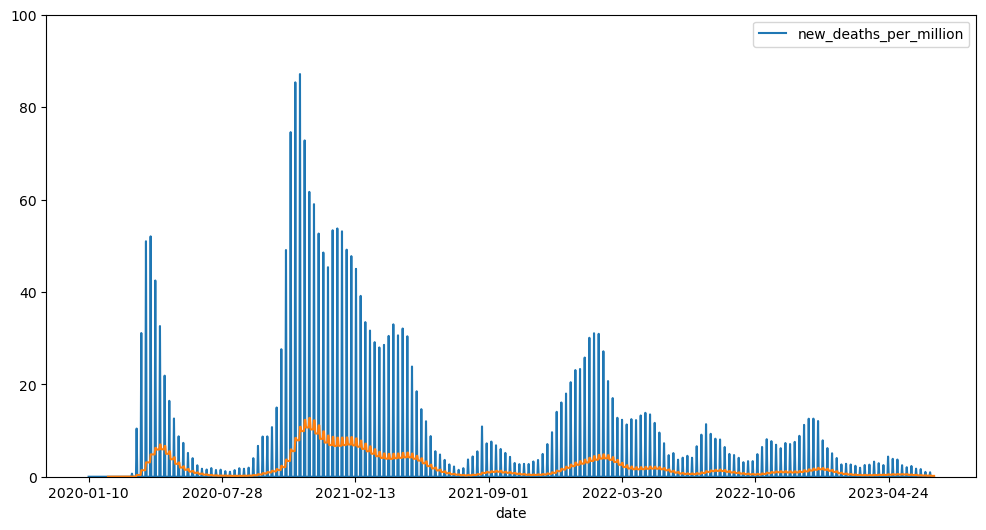

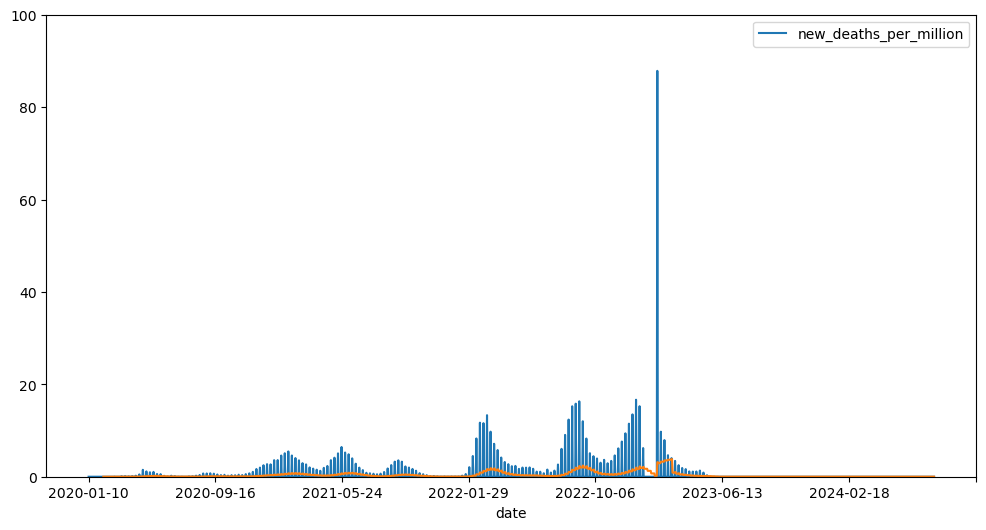

In [47]:
plot_covid_data('United States', 'new_deaths_per_million', True, 100)   
plot_covid_data('Canada', 'new_deaths_per_million', True, 100)   
plot_covid_data('France', 'new_deaths_per_million', True, 100)   
plot_covid_data('Japan', 'new_deaths_per_million', True, 100)   

### All countries almost show same trend so we cannot imply any relationship between obesity and death rate.

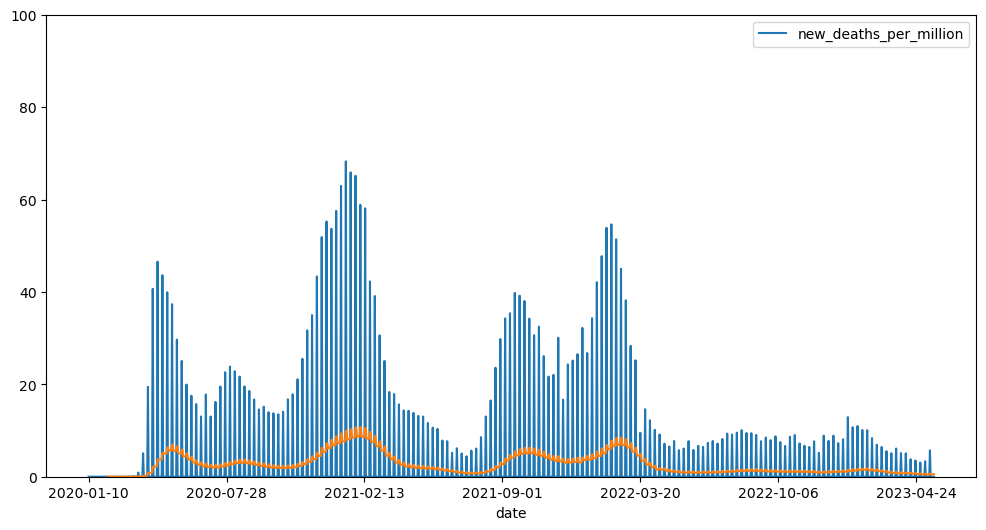

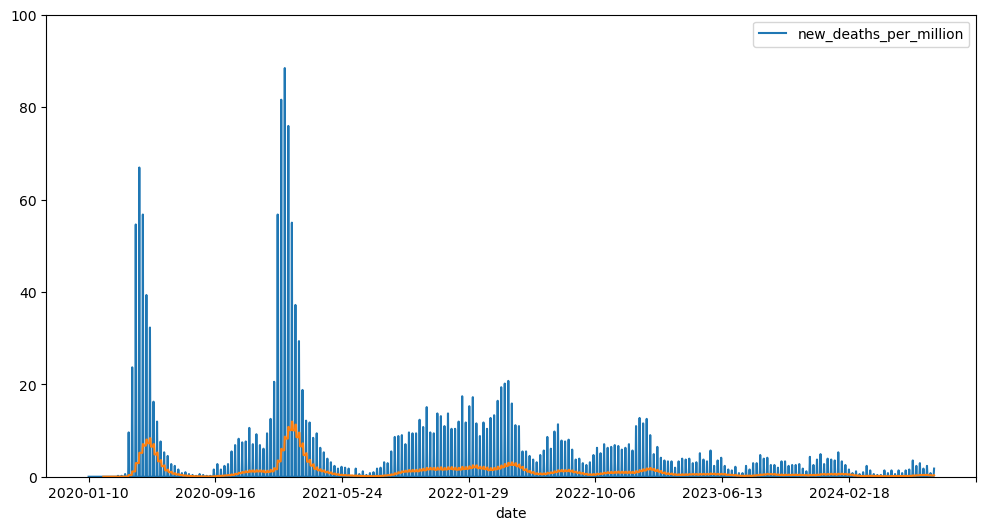

In [48]:
plot_covid_data('United States', 'new_deaths_per_million', True, 100)   
plot_covid_data('Ireland', 'new_deaths_per_million', True, 100)    # Ireland has a comparative low diabetes rate

### The deathrate for Ireland is significantly low. Thus, we can conclude that the diabetes rate is somehow correlated with death rate.

# Does more testing slow the death rate?

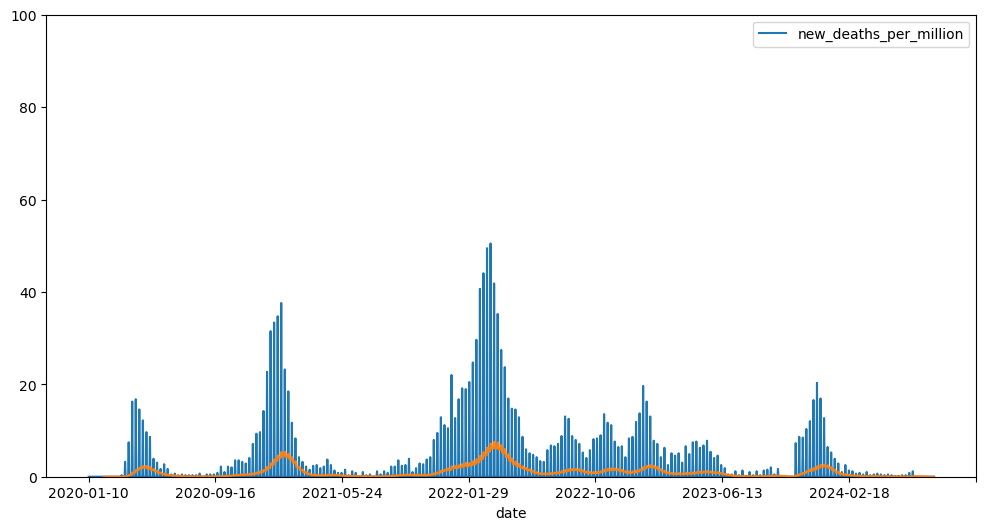

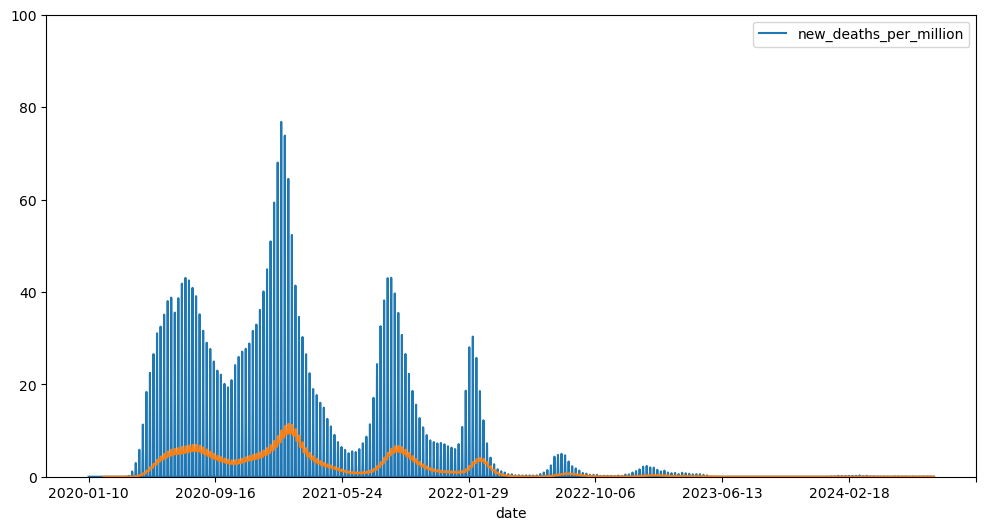

In [49]:
plot_covid_data('Denmark', 'new_deaths_per_million', True, 100)   # Denmark has a high level of testing
plot_covid_data('Mexico', 'new_deaths_per_million', True, 100)   

# The data shows high spikes of death rates for Mecico during the covid peak era.

In [53]:
def scatter_plot(date, col1, col2):
    total_df = pd.DataFrame(columns=['date', 'location', col1, col2])
    
    for c in country_df:
        temp_df = covid_df[(covid_df['location'] == c) & 
                           (covid_df['date'] == date)][['date', 'location', col1, col2]]
        
        # Correct the use of pd.concat here
        total_df = pd.concat([total_df, temp_df], ignore_index=True).fillna(0)
    
    total_df.set_index('date', inplace=True)
    
    # Create a scatter plot
    fig = px.scatter(data_frame=total_df, x=col2, 
                     y=col1, color='location', trendline='ols',
                     hover_data=['location'])
    fig.show()
    
    return total_df

# Example usage
scatter_plot('2020-06-27', 'total_deaths_per_million', 'aged_70_older')

,location,total_deaths_per_million,aged_70_older
date,,,
2020-06-27,Afghanistan,13.505,1.337
2020-06-27,Africa,6.748,0.000
2020-06-27,Albania,14.854,8.643
2020-06-27,Algeria,18.141,3.857
2020-06-27,American Samoa,0.000,0.000
...,...,...,...
2020-06-27,Wallis and Futuna,0.000,0.000
2020-06-27,World,63.723,5.355
2020-06-27,Yemen,6.645,1.583
